In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Text Preprocessing

import re
import string
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
nltk.download('averaged_perceptron_tagger')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_61605/3098026165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sampurnapradhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sampurnapradhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sampurnapradhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package a

In [2]:
df=pd.read_csv('/Users/sampurnapradhan/Desktop/amazon-sentimental-analysis/Musical_instruments_reviews.csv')

In [3]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
df=df.dropna()

In [5]:
df=df.drop(["helpful", "unixReviewTime",	"reviewTime"], axis=1)

In [6]:
# Define sentiment thresholds
thresholds = {
    1: 1,
    2: 1,
    3: 1,
    4: 0,
    5: 0
}

# Map ratings to sentiment labels
df['sentiment'] = df['overall'].map(thresholds)

# Check the unique values in the new 'sentiment' column
print(df['sentiment'].unique())


[0 1]


In [7]:
df['sentiment'].value_counts()

sentiment
0    8991
1    1236
Name: count, dtype: int64

In [8]:
df['sentiment']

0        0
1        0
2        0
3        0
4        0
        ..
10256    0
10257    0
10258    0
10259    0
10260    0
Name: sentiment, Length: 10227, dtype: int64

In [9]:



def add_to_dict(d, filename):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype=float)
            d[word] = vector

words = {}
add_to_dict(words, '/Users/sampurnapradhan/Desktop/amazon-sentimental-analysis/glove.6B.200d.txt')

words['good']


array([ 5.1507e-01,  3.5596e-01,  1.5710e-01, -7.4075e-02, -2.5446e-01,
       -1.1357e-01, -4.9943e-01, -1.2626e-01,  3.8851e-01,  5.4204e-01,
        1.0479e-01,  4.4099e-01, -6.5490e-02,  5.8463e-02,  4.1150e-01,
        5.6709e-01, -1.1869e-01,  2.5107e-01,  2.5640e-01, -2.1615e-01,
        6.4170e-01,  2.7875e+00,  1.2036e-01,  4.9481e-02,  2.4843e-01,
       -6.7390e-01,  1.1957e-03,  3.5802e-01, -1.7588e-01, -3.9135e-01,
       -1.4093e-02,  2.3610e-01, -4.3184e-01, -2.7045e-02,  2.2829e-02,
       -2.8283e-01, -5.0008e-01, -1.1275e-01, -4.5002e-01,  3.3634e-01,
       -5.7722e-03,  3.3005e-01, -2.4671e-01,  1.7358e-01, -3.5508e-01,
       -3.9378e-02,  4.8834e-01,  1.4180e-01, -1.7579e-01,  3.1760e-01,
       -1.5194e-01, -1.1244e-01, -7.0078e-02,  7.4877e-01, -6.2074e-02,
       -1.7296e-01,  1.5001e-01, -5.8035e-02,  1.9471e-01, -2.9521e-01,
        5.0281e-01, -3.3074e-01, -5.4041e-01,  6.4659e-02,  4.1465e-02,
        4.9930e-01,  8.0902e-02,  4.7806e-01,  5.8307e-01,  4.08

In [10]:

len(words)

400000

In [11]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenizer.tokenize("Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,")

['Not',
 'much',
 'to',
 'write',
 'about',
 'here',
 'but',
 'it',
 'does',
 'exactly',
 'what',
 'it',
 's',
 'supposed',
 'to',
 'filters',
 'out',
 'the',
 'pop',
 'sounds',
 'now',
 'my',
 'recordings',
 'are',
 'much',
 'more',
 'crisp',
 'it',
 'is',
 'one',
 'of',
 'the',
 'lowest',
 'prices',
 'pop',
 'filters',
 'on',
 'amazon',
 'so',
 'might',
 'as',
 'well',
 'buy',
 'it',
 'they',
 'honestly',
 'work',
 'the',
 'same',
 'despite',
 'their',
 'pricing']

In [12]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Get the list of English stop words
stop_words = set(stopwords.words('english'))

# Placeholder for tokenizer
tokenizer = word_tokenize

def clean_text(s):
    tokens = tokenizer(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stop_words]

    return useful_tokens

clean_text("Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,")


['much',
 'write',
 ',',
 'doe',
 'exactly',
 "'s",
 'supposed',
 '.',
 'filter',
 'pop',
 'sound',
 '.',
 'recording',
 'much',
 'crisp',
 '.',
 'one',
 'lowest',
 'price',
 'pop',
 'filter',
 'amazon',
 'might',
 'well',
 'buy',
 ',',
 'honestly',
 'work',
 'despite',
 'pricing',
 ',']

<h2>Converting into word vector using GloVe embedding</h2>

In [13]:
 def message_to_word_vectors(message, word_dict=words):

  processed_list_of_tokens = clean_text(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [14]:
message_to_word_vectors("this is a simple loop effects pedal which makes awesome quality loops and unlimited dubs.  you can jam for hours with this thing, it's awesome.").shape

(18, 200)

In [15]:
df = df.sample(frac=1, random_state=1)
df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(df) * 0.7)
split_index_2 = int(len(df) * 0.85)

df, val_df, test_df = df[:split_index_1], df[split_index_1:split_index_2], df[split_index_2:]

len(df), len(val_df), len(test_df)

(7158, 1534, 1535)

In [16]:
test_df

,reviewerID,asin,reviewerName,reviewText,overall,summary,sentiment
8692,A2NYK9KWFMJV4Y,B000978D58,"Mike Tarrani ""Jazz Drummer""",This stand is probably one of the most popular...,4.0,Solid for light use,0
8693,A1W93CKNN8D6L2,B0002M6CVC,Zach Briggs,The fact of the price for this and the 18 cent...,5.0,Great tone,0
8694,AOFLZO8T1IF3B,B001L8NGJ2,Katheryn Bowling,Switches channels on my Mustang II like a char...,4.0,Fender Footswitch,0
8695,A2VSNUK7YLRKRE,B0002E2XCW,"F. Sasso ""Stupidity Should Hurt""",I got the Ocean Turqouise and they are stunnin...,5.0,Beautiful Picks,0
8696,A3UXW18DP4WSD6,B003VWJ2K8,"Richard ""Richard""",so cheap I bought one for each of my ukuleles....,5.0,I love snark tuners,0
...,...,...,...,...,...,...,...
10222,AI45J5737CUGY,B0002H0A3S,wapialo,received in just a few days....to a beginner l...,5.0,very fast,0
10223,A1LJXZC1RFW07C,B003B0I09Y,K. Ray,I bought this because I had a gig in a dark ba...,4.0,Bright and 3 page coverage,0
10224,A356YVTEMDX69J,B0002D0CL2,"Psych PhD ""Psych PhD""","I love these picks. Great for lead playing, an...",5.0,Small-size picks for petite hands! :),0
10225,A3MONHA5DCPPLZ,B000OR2QX8,3rdtimer,These replaced the ETB92 nylon tapewounds I tr...,4.0,"Good thump, responsive smooth.",0


<h2>DataFrame to Word Vector Sequences Conversion for Sentiment Analysis</h2>

In [17]:


def df_to_X_y(df):
    
    y = df['sentiment'].to_numpy().astype(int)
    
    all_word_vector_sequences = []

    max_length = 0  # Initialize maximum sequence length

    for message in df['reviewText']:
        message_as_vector_seq = message_to_word_vectors(message)
        
        if message_as_vector_seq.shape[0] == 0:
            message_as_vector_seq = np.zeros(shape=(1, 200))  # Assuming 200 is the dimensionality of the word vectors
        
        all_word_vector_sequences.append(message_as_vector_seq)
    return all_word_vector_sequences, y

    # # Pad sequences to ensure they all have the same length
    # padded_sequences = [np.pad(seq, ((0, max_length - seq.shape[0]), (0, 0)), mode='constant') for seq in all_word_vector_sequences]
    
    # return np.array(padded_sequences), y




In [18]:
X_train, y_train =df_to_X_y(df)
print(len(X_train), len(X_train[0]))

7158 18


In [19]:
print(len(X_train), len(X_train[2062]))


7158 108


<h2>Data Visualization</h2>

<h2>Distribution of Rating</h2>

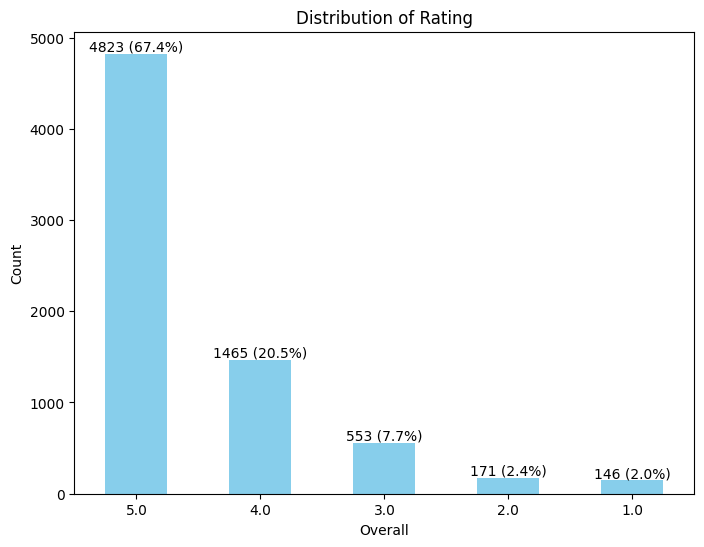

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a column named 'overall'

# Plot the distribution of rating
plt.figure(figsize=(8, 6))
ax = df['overall'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Rating')
plt.xlabel('Overall')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if necessary

# Label the bars with sentiment labels and counts
for i, count in enumerate(df['overall'].value_counts()):
    ax.text(i, count + 0.1, f"{count} ({count/df['overall'].count()*100:.1f}%)", ha='center', va='bottom')

plt.show()


<h2>horizontal bar plot shoing Top 10 Most common word without stopwords</h2>

/var/folders/dd/j9rz49n92234gdwk4_2bygfh0000gn/T/ipykernel_61605/3106943677.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts, y=words, palette='viridis')


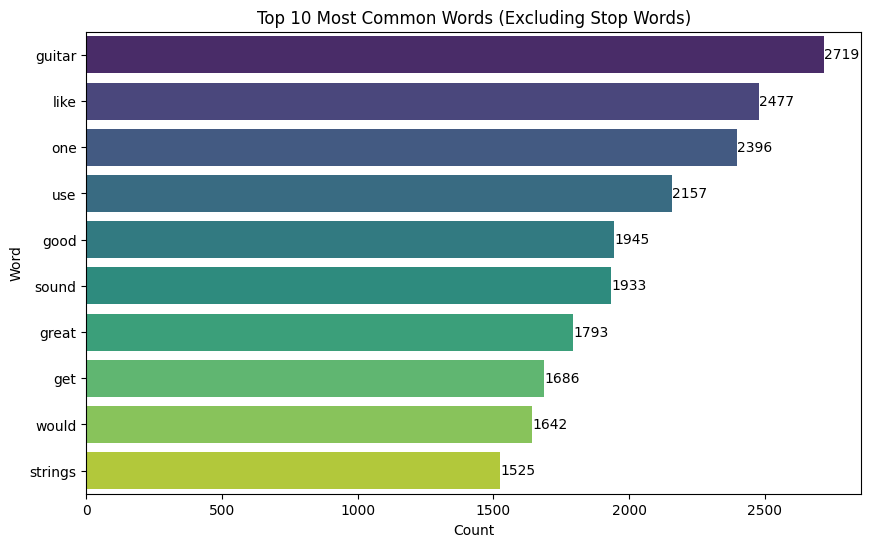

In [58]:
def get_most_common_words(texts, n=10):
    # Get NLTK stop words
    stop_words = set(stopwords.words('english'))
    
    # Tokenize the texts and filter out stop words
    tokens = [word for text in texts for word in text.split() if word.lower() not in stop_words]
    
    # Count occurrences of each token
    word_counts = Counter(tokens)
    
    # Get the most common words
    most_common = word_counts.most_common(n)
    return most_common

# Get the most common words excluding stop words from reviewText column
most_common_words = get_most_common_words(df['reviewText'], n=10)

# Plotting
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=counts, y=words, palette='viridis')
plt.title('Top 10 Most Common Words (Excluding Stop Words)')
plt.xlabel('Count')
plt.ylabel('Word')

# Add number of occurrences on top of each bar
for i, count in enumerate(counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black')

plt.show()

<h2>Distribution of Sentiment Classes (Positive vs. Negative)</h2>

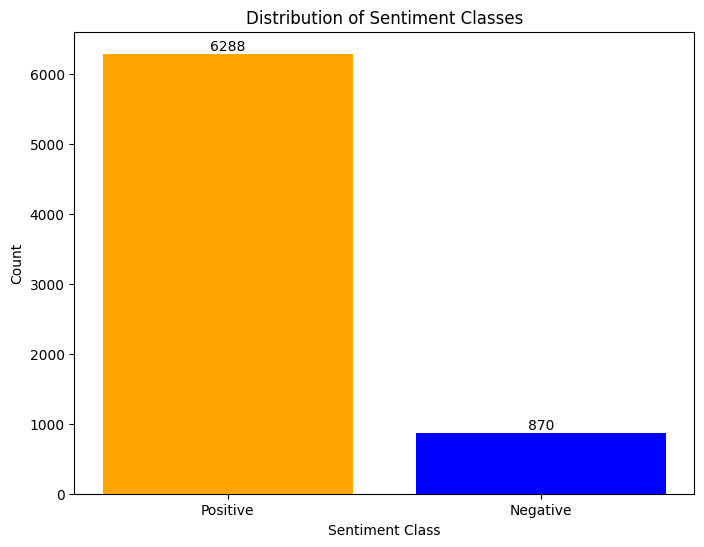

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Plot the distribution of sentiment classes
plt.figure(figsize=(8, 6))
ax = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['orange', 'blue'])
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Classes')

# Add value counts on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xticks(sentiment_counts.index, ['Positive', 'Negative'])
plt.show()


(array([6.623e+03, 4.190e+02, 8.100e+01, 2.100e+01, 4.000e+00, 6.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.4230e+02, 2.8360e+02, 4.2490e+02, 5.6620e+02,
        7.0750e+02, 8.4880e+02, 9.9010e+02, 1.1314e+03, 1.2727e+03,
        1.4140e+03]),
 <BarContainer object of 10 artists>)

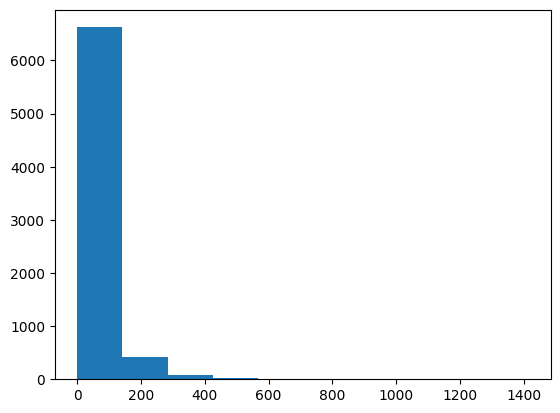

In [23]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [24]:
max_length = max(sequence_lengths)
print("Maximum sequence length:", max_length)

Maximum sequence length: 1414


In [26]:
pd.Series(sequence_lengths).describe()


count    7158.000000
mean       56.700475
std        71.019186
min         1.000000
25%        20.000000
50%        34.000000
75%        64.000000
max      1414.000000
dtype: float64

<h2>Padding Sequences for Machine Learning Input</h2>

In [27]:
from copy import deepcopy
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def pad_X(X, max_sequence_length=210):
    X_copy = deepcopy(X)

    for i, x in enumerate(X):
        # Pad the current sequence
        padded_sequence = pad_sequences([x], maxlen=max_sequence_length, padding='post', truncating='post')[0]
        
        # Replace the original sequence with the padded sequence
        X_copy[i] = padded_sequence
    
    return np.array(X_copy).astype(float)


In [28]:
 X_train = pad_X(X_train,)

X_train.shape

(7158, 210, 200)

In [29]:
y_train.shape

(7158,)

In [30]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((1534, 210, 200), (1534,))

In [31]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((1535, 210, 200), (1535,))

In [32]:
input_shape = X_train.shape[1:]
input_shape

(210, 200)

In [33]:
# Assuming y_train contains your training labels
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

Number of classes: 2


<h2># Reshape X_train to 2D array as it has 3 dimensions</h2>

In [34]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)

<h2>Cluster Analysis using t-SNE</h2>

In [35]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3  # You can adjust this value based on your data

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to your data
kmeans.fit(X_train_reshaped)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_



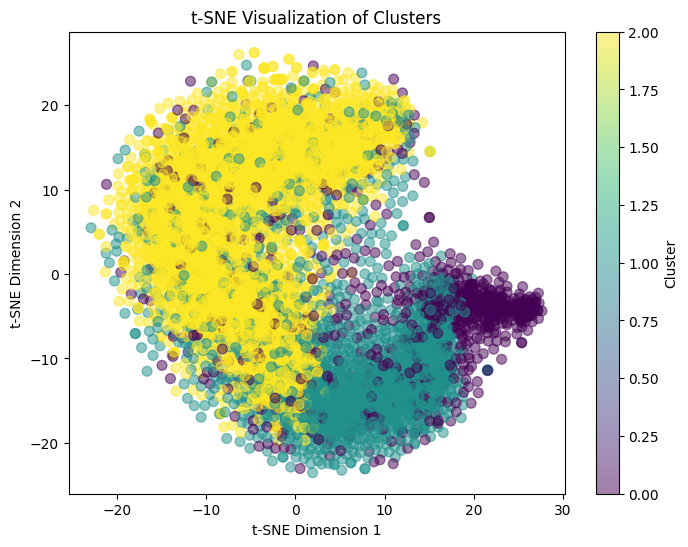

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_reshaped)

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

<h2>Logestic Regression Model</h2>

In [37]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train_reshaped, y_train)


LogisticRegression(solver='liblinear')

<h2>Train and test result of LR (Logestic Regression) Model</h2>

In [38]:
# Evaluate the model on the training data
train_score = LR.score(X_train_reshaped, y_train)
print("Train score:", train_score)

# Reshape X_test to 2D array if it has 3 dimensions
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Now X_test_reshaped should be a 2D array

# Evaluate the model on the test data
test_score = LR.score(X_test_reshaped, y_test)
print("Test score:", test_score)

Train score: 0.997625034925957
Test score: 0.8429967426710098


<h2>Long Short Term Memory(LSTM) Model</h2>

In [39]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define the best parameters found
best_params = {
    'dropout_rate': 0.1,
    'regularization_strength': 0.001,
    'learning_rate': 0.001,
    'lstm_units': 32
}

# Define the model
model = Sequential([])

model.add(layers.Input(shape=(210, 200)))
model.add(layers.LSTM(best_params['lstm_units'], return_sequences=True, kernel_regularizer=l2(best_params['regularization_strength'])))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.LSTM(best_params['lstm_units'], return_sequences=True, kernel_regularizer=l2(best_params['regularization_strength'])))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.LSTM(best_params['lstm_units'], return_sequences=True, kernel_regularizer=l2(best_params['regularization_strength'])))
model.add(layers.Dropout(best_params['dropout_rate']))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))




In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 210, 32)        │        29,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 210, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 210, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 210, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 210, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 210, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6720)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         6,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,185 (207.75 KB)

 Trainable params: 53,185 (207.75 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/model_checkpoint.keras', save_best_only=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [42]:

# Compute class frequencies using pd.Series(obj).value_counts()
frequencies = pd.Series(df['sentiment']).value_counts()
frequencies




sentiment
0    6288
1     870
Name: count, dtype: int64

<h2>Long Short Term Memory(LSTM) Model</h2>

In [43]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp])

Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.8687 - loss: 0.5389 - val_accuracy: 0.8814 - val_loss: 0.3857
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8760 - loss: 0.3916 - val_accuracy: 0.8814 - val_loss: 0.3856
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8790 - loss: 0.3673 - val_accuracy: 0.8814 - val_loss: 0.3675
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.8845 - loss: 0.3475 - val_accuracy: 0.8814 - val_loss: 0.3560
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8768 - loss: 0.3566 - val_accuracy: 0.8833 - val_loss: 0.3571
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8789 - loss: 0.3516 - val_accuracy: 0.8787 - val_loss: 0.3578
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8839 - loss: 0.3351 - val_accuracy: 0.8827 - val_loss: 0.3545
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.8737 - loss: 0.3544 - 

In [44]:
from tensorflow.keras.models import load_model

best_model = load_model('model/model_checkpoint.keras')

<h2>Training Result</h2>

In [45]:
train_predictions = (best_model.predict(X_train) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_train, train_predictions))

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      6288
           1       0.82      0.02      0.03       870

    accuracy                           0.88      7158
   macro avg       0.85      0.51      0.48      7158
weighted avg       0.87      0.88      0.83      7158



<h2>Test Result</h2>

In [46]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1351
           1       0.50      0.01      0.02       184

    accuracy                           0.88      1535
   macro avg       0.69      0.50      0.48      1535
weighted avg       0.84      0.88      0.83      1535



<h2>Training LSTM Model with handling imbalance dataset</h2>

In [47]:


cp1 = ModelCheckpoint('model/model_checkpoint1.keras', save_best_only=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


<h2>Using class weight</h2>

In [48]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights using frequencies
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to dictionary format
weights = {i: class_weights[i] for i in range(len(class_weights))}



In [49]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp1], class_weight=weights)

Epoch 1/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.7618 - loss: 0.5372 - val_accuracy: 0.6369 - val_loss: 0.7124
Epoch 2/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7590 - loss: 0.4884 - val_accuracy: 0.7164 - val_loss: 0.5789
Epoch 3/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.7908 - loss: 0.4703 - val_accuracy: 0.6871 - val_loss: 0.6299
Epoch 4/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7793 - loss: 0.4672 - val_accuracy: 0.7236 - val_loss: 0.6057
Epoch 5/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7849 - loss: 0.4656 - val_accuracy: 0.6728 - val_loss: 0.6854
Epoch 6/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.7863 - loss: 0.4523 - val_accuracy: 0.5189 - val_loss: 1.0332
Epoch 7/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.7847 - loss: 0.4609 - val_accuracy: 0.6877 - val_loss: 0.7052
Epoch 8/20
224/224 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.8069 - loss: 0.4220 - 

In [50]:
from tensorflow.keras.models import load_model

best_model1 = load_model('model/model_checkpoint1.keras')

<h2>Train result </h2>

In [51]:
train_predictions = (best_model1.predict(X_train) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_train, train_predictions))

224/224 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      6288
           1       0.52      0.78      0.62       870

    accuracy                           0.89      7158
   macro avg       0.74      0.84      0.78      7158
weighted avg       0.91      0.89      0.89      7158



<h2>Test result</h2>

In [52]:
test_predictions = (best_model1.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1351
           1       0.24      0.38      0.30       184

    accuracy                           0.79      1535
   macro avg       0.58      0.61      0.58      1535
weighted avg       0.83      0.79      0.80      1535

